Using data from https://github.com/8090-inc/top-coder-challenge/ - public_cases.json

## About the Problem
Reverse engineering a 60-year-old travel reimbursement system using only historical data and employee interviews. Applying ML techniques to discover business logic patterns and create predictive models that replicate the legacy system's behavior. 
The legacy reimbursement system has been running for 60 years but no one knows how it works. A new system was built but the company doesn't know the differences in the results. 
Use ML to understand the original business logic and create a model that can explain/predict the legacy system's behavior. 

## Input Variables 
This is the data provided by the legacy system:
- trip_duration_days: number of days spent traveling (int)
- miles_traveled: total miles traveled (int)
- total_receipts_amount: total dollar amount of receipts (flot)

## Output Data
This is what the ML model is supposed to predict
- Single numeric reimbursement amount (float, rounded to 2 decimal places)

## About the Dataset
1,000 historical input/output examples from public_cases.json. 750 should be used for training and the remaining 250 should be for testing. 

## Documentation Used:
Installing Libraries:
- https://stackoverflow.com/questions/77588476/how-can-i-install-matplotlib-in-jupyter-notebook

Data from JSON Files:
- https://stackoverflow.com/questions/56163430/how-to-parse-json-to-get-all-values-of-a-specific-key-within-an-array

Scatterplots and Statistical Summary:
- https://www.geeksforgeeks.org/data-visualization/box-plot-in-python-using-matplotlib/
- https://stackoverflow.com/questions/3878245/tukey-five-number-summary-in-python
- https://stats.libretexts.org/Courses/Los_Angeles_City_College/Introductory_Statistics/02%3A_Descriptive_Statistics/2.07%3A_Skewness_and_the_Mean_Median_and_Mode

Histogram and Distribution Analysis:
- https://www.geeksforgeeks.org/data-visualization/plotting-histogram-in-python-using-matplotlib/

Scatter Plots:
- https://www.w3schools.com/python/pandas/pandas_dataframes.asp
- https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

Correlation Coefficient Matrix:
- https://www.geeksforgeeks.org/data-science/create-a-correlation-matrix-using-python/

In [6]:
# Install all libraries
%pip install matplotlib
%pip install pandas
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Getting Data from JSON Files

In [7]:
import json
import pandas as pd

# Getting data from the JSON file
contents = []

try:
    with open("..\\public_cases.json", 'r') as f:
        contents = json.load(f)
except Exception as e:
    print(e)

# Separating input features and output data
input = [item.get("input") for item in contents]
miles = [item.get("miles_traveled") for item in input]
days = [item.get("trip_duration_days") for item in input]
amount = [item.get("total_receipts_amount") for item in input]
output = [item.get("expected_output") for item in contents]

# Convert data into a data frame
data = {
    "miles_traveled": miles,
    "trip_duration_days": days,
    "total_receipts_amount": amount,
    "expected_output": output
}

dataFrame = pd.DataFrame(data)

## Statistical Summary and Outlier Detection/Analysis of All Input/Output Variables
Below are box plots for all of the descriptive features and target features as well as a 5-number summary. The "showfliers" parameter was set to true to show any outliers. As you see in all box plots, however, there are no outliers Analysis is presented below each graph and its summary.

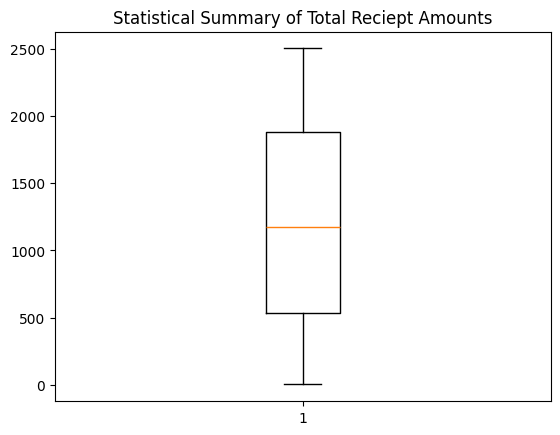

count    1000.00000
mean     1211.05687
std       742.85418
min         1.42000
25%       530.37750
50%      1171.90000
75%      1881.10500
max      2503.46000
Name: total_receipts_amount, dtype: float64

In [8]:
import matplotlib.pyplot as plt

plt.boxplot(amount, showfliers=True)
plt.title("Statistical Summary of Total Reciept Amounts")
plt.show()

dataFrame["total_receipts_amount"].describe()

Analysis: The data for the "Total Receipts Amount" data is slightly skewed right since the mean is greater than the median (or the 3rd Quartile/50%).

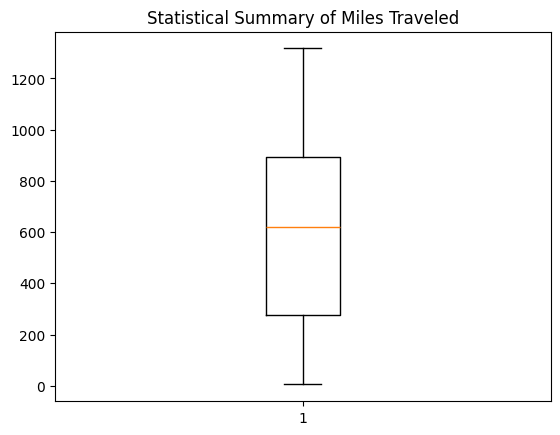

count    1000.00000
mean      597.41374
std       351.29979
min         5.00000
25%       275.96000
50%       621.00000
75%       893.00000
max      1317.07000
Name: miles_traveled, dtype: float64

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(miles, showfliers=True)
plt.title("Statistical Summary of Miles Traveled")
plt.show()

dataFrame["miles_traveled"].describe()

Analysis: The data for "Miles Traveled" is skewed to the left since the mean is less than the median/50% of the data. 

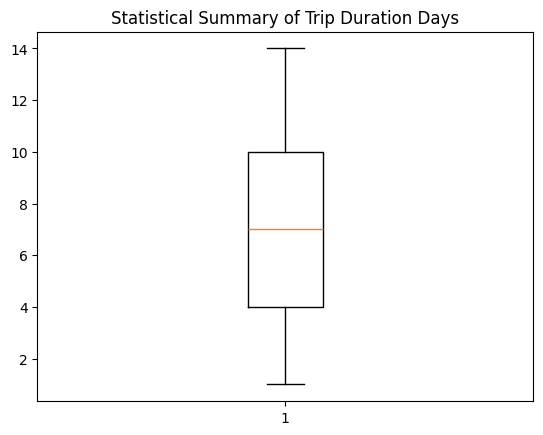

count    1000.000000
mean        7.043000
std         3.926139
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        14.000000
Name: trip_duration_days, dtype: float64

In [10]:
import matplotlib.pyplot as plt

plt.boxplot(days, showfliers=True)
plt.title("Statistical Summary of Trip Duration Days")
plt.show()

dataFrame["trip_duration_days"].describe()

Analysis: The data for "Trip Durations Days" is skewed to the right since the mean is greater than the median (50%) but only by about 0.043.

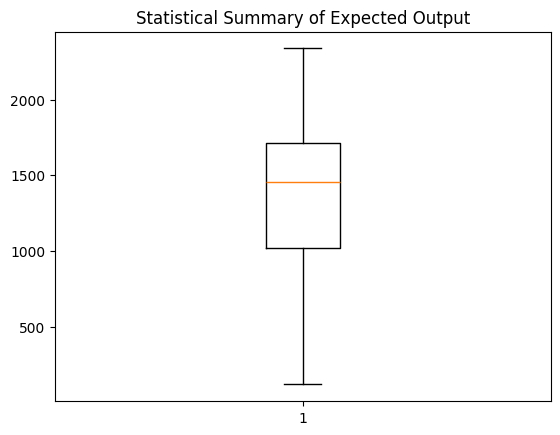

count    1000.000000
mean     1349.114030
std       470.316464
min       117.240000
25%      1019.297500
50%      1454.260000
75%      1711.122500
max      2337.730000
Name: expected_output, dtype: float64

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(output, showfliers=True)
plt.title("Statistical Summary of Expected Output")
plt.show()

dataFrame["expected_output"].describe()

Analysis: The data for "Expected Output" is skewed to the left since the mean is less than the median. 

## Distribution Analysis and Visualization

Text(0.5, 1.0, 'Distribution of Total Receipt Amounts')

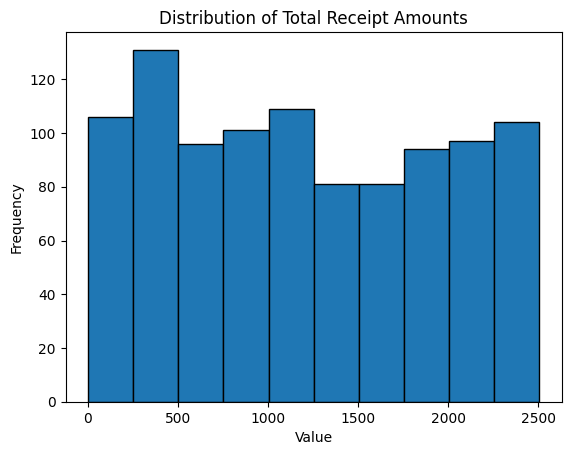

In [12]:
import matplotlib.pyplot as plt

plt.hist(amount, edgecolor = "black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Total Receipt Amounts")

Text(0.5, 1.0, 'Distribution of Trip Duration Days')

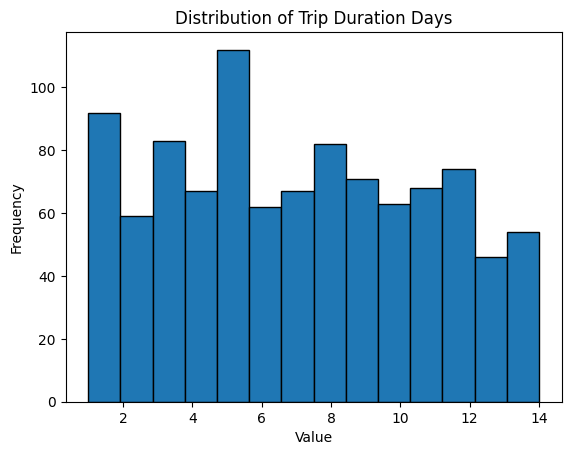

In [13]:
import matplotlib.pyplot as plt

plt.hist(days, edgecolor = "black", bins = 14)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Duration Days")

Text(0.5, 1.0, 'Distribution of Miles Traveled')

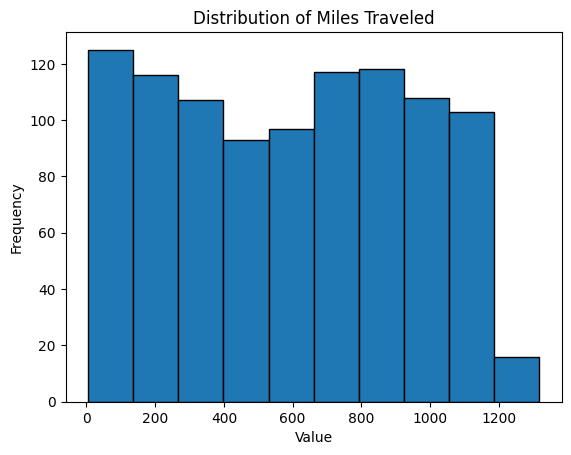

In [14]:
import matplotlib.pyplot as plt

plt.hist(miles, edgecolor = "black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Miles Traveled")

Text(0.5, 1.0, 'Distribution of Expected Output')

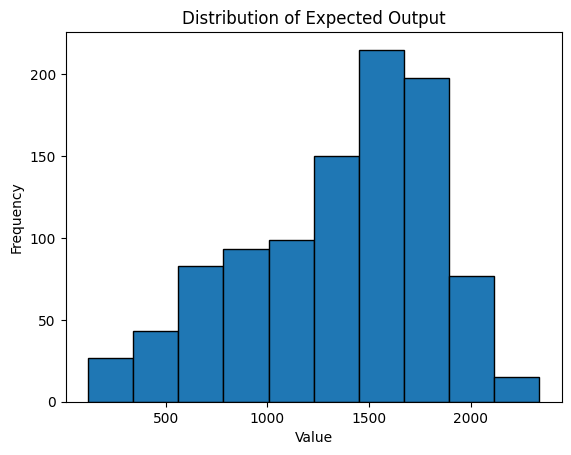

In [15]:
import matplotlib.pyplot as plt

plt.hist(output, edgecolor = "black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Expected Output")

## Correlation Analysis Between Inputs and Outputs

array([[<Axes: xlabel='miles_traveled', ylabel='miles_traveled'>,
        <Axes: xlabel='trip_duration_days', ylabel='miles_traveled'>,
        <Axes: xlabel='total_receipts_amount', ylabel='miles_traveled'>,
        <Axes: xlabel='expected_output', ylabel='miles_traveled'>],
       [<Axes: xlabel='miles_traveled', ylabel='trip_duration_days'>,
        <Axes: xlabel='trip_duration_days', ylabel='trip_duration_days'>,
        <Axes: xlabel='total_receipts_amount', ylabel='trip_duration_days'>,
        <Axes: xlabel='expected_output', ylabel='trip_duration_days'>],
       [<Axes: xlabel='miles_traveled', ylabel='total_receipts_amount'>,
        <Axes: xlabel='trip_duration_days', ylabel='total_receipts_amount'>,
        <Axes: xlabel='total_receipts_amount', ylabel='total_receipts_amount'>,
        <Axes: xlabel='expected_output', ylabel='total_receipts_amount'>],
       [<Axes: xlabel='miles_traveled', ylabel='expected_output'>,
        <Axes: xlabel='trip_duration_days', ylabel='expect

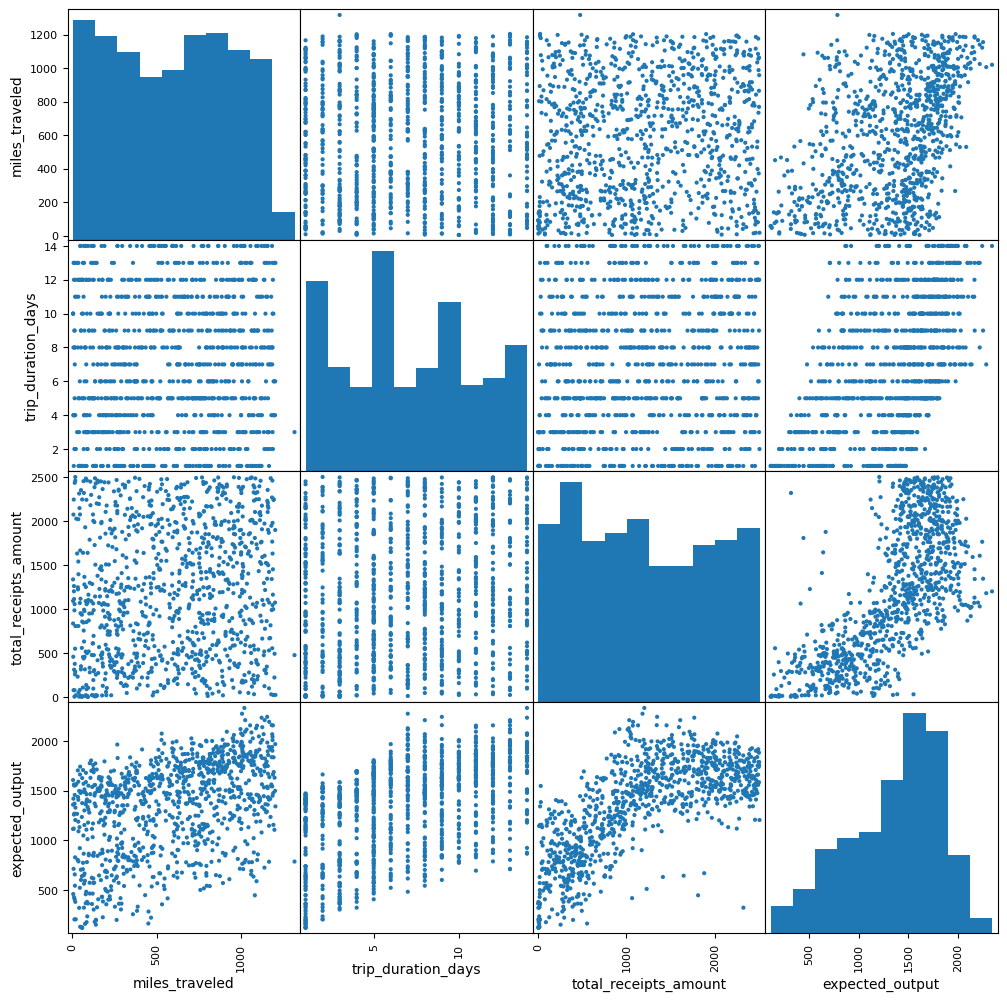

In [16]:
import pandas as pd

# Draw a scatter matrix
pd.plotting.scatter_matrix(dataFrame, alpha=1, figsize=(12, 12))

**Analysis of Scatter Plot Matrix**: Positive correlations between Miles Traveled vs. Expected Output and Total Receipts Amount vs. Expected Output. There is no correlation/the points are very scattered for Miles Traveled vs. Total Receipts Amount. There are verticle/horizontal lines, meaning there is also no correlation, between Miles Traveled vs. Trip Duration Days, Trip Duration Days vs. Expected Output, and Tip Duration Days vs. Total Receipts Amount.

In [17]:
# Draw a correlation matrix
matrix = dataFrame.corr()
print(matrix)

                       miles_traveled  trip_duration_days  \
miles_traveled               1.000000            0.046050   
trip_duration_days           0.046050            1.000000   
total_receipts_amount        0.131548            0.132897   
expected_output              0.431662            0.513509   

                       total_receipts_amount  expected_output  
miles_traveled                      0.131548         0.431662  
trip_duration_days                  0.132897         0.513509  
total_receipts_amount               1.000000         0.704035  
expected_output                     0.704035         1.000000  


**Analysis of Correlation Coefficient Matrix**: The closer to 1 the coefficients are, the higher the correaltion. The closer to 0 the coefficient is, the lower the correlation is. The highest correlation we see (besides the correlations between each feature and itself) is Expected Output and the Total Receipts Amount. The lowest correlation is Miles Traveled and Trip Duration Days.

## Missing Data Assessment

In [18]:
import pandas as pd

# See if there is missing data for any features - false if there are no missing values
missing_miles = pd.isnull(dataFrame["miles_traveled"])
missing_days = pd.isnull(dataFrame["trip_duration_days"])
missing_amount = pd.isnull(dataFrame["total_receipts_amount"])
missing_output = pd.isnull(dataFrame["expected_output"])

# Print only the missing values
print(dataFrame[missing_miles])
print(dataFrame[missing_days])
print(dataFrame[missing_amount])
print(dataFrame[missing_output])

Empty DataFrame
Columns: [miles_traveled, trip_duration_days, total_receipts_amount, expected_output]
Index: []
Empty DataFrame
Columns: [miles_traveled, trip_duration_days, total_receipts_amount, expected_output]
Index: []
Empty DataFrame
Columns: [miles_traveled, trip_duration_days, total_receipts_amount, expected_output]
Index: []
Empty DataFrame
Columns: [miles_traveled, trip_duration_days, total_receipts_amount, expected_output]
Index: []


Analysis: As we can see, there are no missing data values present in the dataset